
# Install & Import Library 

In [1]:
!git clone https://github.com/auliaastikaaa/UAS-Kapsel

fatal: destination path 'UAS-Kapsel' already exists and is not an empty directory.


In [2]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/corpus_sederhana.txt
!wget -P / https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/lib/taudataNlpTm.py
!pip install unidecode textblob sastrawi
!pip install unidecode twython tweepy beautifulsoup4 tika
!pip install spacy python-crfsuite unidecode textblob sastrawi
!python -m spacy download en
!python -m spacy download xx
!python -m spacy download en_core_web_sm

mkdir: cannot create directory ‘data’: File exists
--2021-12-13 22:41:27--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29041 (28K) [text/plain]
Saving to: ‘data/slang.txt.3’

slang.txt.3         100%[===================>]  28.36K  --.-KB/s    in 0.001s  

2021-12-13 22:41:27 (43.0 MB/s) - ‘data/slang.txt.3’ saved [29041/29041]

--2021-12-13 22:41:27--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP req

In [3]:
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')
import tweepy, json, nltk, urllib.request, requests, re
import matplotlib.pyplot as plt
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as bs
from nltk.tokenize import TweetTokenizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('popular')
nltk.download('punkt')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

# Load Data Crawling

In [4]:
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

def saveTweets(tweets, file='Tweets.json'): #in Json Format
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(json.dumps(t)+'\n')
            except:
                pass

In [5]:
DT1 = loadTweets(file='/content/UAS-Kapsel/data/databanjirlongsor.json')
DT2 = loadTweets(file='/content/UAS-Kapsel/data/databencanalongsor.json')
DT3 = loadTweets(file='/content/UAS-Kapsel/data/dataerosi.json')
DT4 = loadTweets(file='/content/UAS-Kapsel/data/datahujan.json')
DT5 = loadTweets(file='/content/UAS-Kapsel/data/datakorbanlongsor.json')
DT6 = loadTweets(file='/content/UAS-Kapsel/data/datalongsor.json')
DT7 = loadTweets(file='/content/UAS-Kapsel/data/datalongsorbali.json')
DT8 = loadTweets(file='/content/UAS-Kapsel/data/datalongsorlombok.json')
DT9 = loadTweets(file='/content/UAS-Kapsel/data/datatanahlongsor.json')
DT10 = loadTweets(file='/content/UAS-Kapsel/data/tweets_akibatlongsorr.json')
DT11 = loadTweets(file='/content/UAS-Kapsel/data/tweets_bantuanlongsorr.json')
DT12 = loadTweets(file='/content/UAS-Kapsel/data/tweets_daerahlongsorr.json')
DT13 = loadTweets(file='/content/UAS-Kapsel/data/tweets_dampaklongsorr.json')
DT14 = loadTweets(file='/content/UAS-Kapsel/data/tweets_donasilongsorr.json')
DT15 = loadTweets(file='/content/UAS-Kapsel/data/tweets_ekonomilongsorr.json')
DT16 = loadTweets(file='/content/UAS-Kapsel/data/tweets_listriklongsorr.json')
DT17 = loadTweets(file='/content/UAS-Kapsel/data/tweets_pembangunanlongsorr.json')
DT18 = loadTweets(file='/content/UAS-Kapsel/data/tweets_provinsilongsorr.json')
DT19 = loadTweets(file='/content/UAS-Kapsel/data/tweets_pusatlongsorr.json')
DT20 = loadTweets(file='/content/UAS-Kapsel/data/tweets_rawanlongsorr.json')
DT21 = loadTweets(file='/content/UAS-Kapsel/data/tweets_rumahlongsorr.json')
DT22 = loadTweets(file='/content/UAS-Kapsel/data/tweets_sekolahlongsorr.json')
DT23 = loadTweets(file='/content/UAS-Kapsel/data/tweets_tahunlongsorr.json')
DT24 = loadTweets(file='/content/UAS-Kapsel/data/tweets_waktulongsorr.json')
DT25 = loadTweets(file='/content/UAS-Kapsel/data/tweets_wilayahlongsorr.json')

In [6]:
data = DT1 + DT2 + DT3 + DT4 + DT5 + DT6 +DT7 + DT8 + DT9 + DT10 + DT11 + DT12+ DT13 + DT14 + DT15 + DT16 + DT17+ DT18 + DT19 + DT20 + DT21 + DT22 + DT23 + DT24 + DT25

In [7]:
#Menyimpan hasil crawling twitter
#fileName = '/content/data.json'
#saveTweets(data,file=fileName)
#print('Saved to '+fileName)

In [8]:
#data = loadTweets(file='/content/data.json')

In [9]:
df = pd.DataFrame(data)

In [10]:
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Dec 07 07:07:33 +0000 2021,1468114943245357057,1468114943245357057,"RT @KyaiTebas: Semeru Erupsi\nKolaka, Blitar &...",False,"[0, 152]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1251995229181231104, 'id_str': '1251995...",None,None,None,None,{'created_at': 'Mon Dec 06 13:15:13 +0000 2021...,False,11,0,False,False,in,NaN,NaN,NaN,NaN,NaN
1,Tue Dec 07 07:04:24 +0000 2021,1468114149968281601,1468114149968281601,RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1437427188026904585, 'id_str': '1437427...",None,None,None,None,{'created_at': 'Mon Dec 06 14:20:33 +0000 2021...,False,8,0,False,False,in,NaN,NaN,NaN,NaN,NaN
2,Tue Dec 07 07:03:43 +0000 2021,1468113980057010178,1468113980057010178,RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1430159016395644928, 'id_str': '1430159...",None,None,None,None,{'created_at': 'Mon Dec 06 14:20:33 +0000 2021...,False,8,0,False,False,in,NaN,NaN,NaN,NaN,NaN
3,Tue Dec 07 07:00:14 +0000 2021,1468113102948364288,1468113102948364288,RT @Lania_Rizky: bibit-bibit yang diproduksi d...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1334214305315622912, 'id_str': '1334214...",None,None,None,None,{'created_at': 'Tue Dec 07 01:57:17 +0000 2021...,False,4,0,False,False,in,NaN,NaN,NaN,NaN,NaN
4,Tue Dec 07 06:59:51 +0000 2021,1468113007125270530,1468113007125270530,"RT @DPPFPI_Official: Semeru Erupsi\nKolaka, Bl...",False,"[0, 152]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1318016044569538560, 'id_str': '1318016...",None,None,None,None,{'created_at': 'Mon Dec 06 12:29:18 +0000 2021...,False,333,0,False,False,in,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,Sat Dec 04 10:09:54 +0000 2021,1467073668098387968,1467073668098387968,Polres Klaten memberikan bantuan kepada masyar...,False,"[0, 278]","{'hashtags': [{'text': 'polresklaten', 'indice...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1284070545495953414, 'id_str': '1284070...",None,None,None,None,NaN,False,0,0,False,False,in,"{'media': [{'id': 1467072233570910211, 'id_str...",False,NaN,NaN,NaN
11876,Sat Dec 04 10:03:48 +0000 2021,1467072132911824897,1467072132911824897,Polres Klaten memberikan bantuan kepada masyar...,False,"[0, 274]","{'hashtags': [{'text': 'klaten', 'indices': [2...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 872674304504119296, 'id_str': '87267430...",None,None,None,None,NaN,False,0,0,False,False,in,NaN,False,NaN,NaN,NaN
11877,Sat Dec 04 09:59:35 +0000 2021,1467071071689924610,146707

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11880 entries, 0 to 11879
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 11880 non-null  object 
 1   id                         11880 non-null  int64  
 2   id_str                     11880 non-null  object 
 3   full_text                  11880 non-null  object 
 4   truncated                  11880 non-null  bool   
 5   display_text_range         11880 non-null  object 
 6   entities                   11880 non-null  object 
 7   metadata                   11880 non-null  object 
 8   source                     11880 non-null  object 
 9   in_reply_to_status_id      2203 non-null   float64
 10  in_reply_to_status_id_str  2203 non-null   object 
 11  in_reply_to_user_id        2239 non-null   float64
 12  in_reply_to_user_id_str    2239 non-null   object 
 13  in_reply_to_screen_name    2239 non-null   obj

In [12]:
df = df[['created_at','full_text','source','place','retweet_count','favorite_count']]

In [13]:
user = [t['user'] for t in data]

In [14]:
df_user = pd.DataFrame(user)

In [15]:
df_user.keys()

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url',
       'entities', 'protected', 'followers_count', 'friends_count',
       'listed_count', 'created_at', 'favourites_count', 'utc_offset',
       'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang',
       'contributors_enabled', 'is_translator', 'is_translation_enabled',
       'profile_background_color', 'profile_background_image_url',
       'profile_background_image_url_https', 'profile_background_tile',
       'profile_image_url', 'profile_image_url_https', 'profile_banner_url',
       'profile_link_color', 'profile_sidebar_border_color',
       'profile_sidebar_fill_color', 'profile_text_color',
       'profile_use_background_image', 'has_extended_profile',
       'default_profile', 'default_profile_image', 'following',
       'follow_request_sent', 'notifications', 'translator_type',
       'withheld_in_countries'],
      dtype='object')

In [16]:
df_user = df_user[['id','id_str','name','screen_name',\
                  'location','followers_count','friends_count',\
                   'listed_count', 'favourites_count']]

In [17]:
df2 = pd.concat([df, df_user], axis=1)

In [18]:
df2.head()

,created_at,full_text,source,place,retweet_count,favorite_count,id,id_str,name,screen_name,location,followers_count,friends_count,listed_count,favourites_count
0,Tue Dec 07 07:07:33 +0000 2021,"RT @KyaiTebas: Semeru Erupsi\nKolaka, Blitar &...","<a href=""http://twitter.com/download/android"" ...",None,11,0,1251995229181231104,1251995229181231104,Nama Tidak Boleh Kosong,yakult_marimas,,639,659,0,33248
1,Tue Dec 07 07:04:24 +0000 2021,RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA...,"<a href=""http://twitter.com/download/android"" ...",None,8,0,1437427188026904585,1437427188026904585,inboxpetiga,inboxpetiga,,54,27,0,568
2,Tue Dec 07 07:03:43 +0000 2021,RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA...,"<a href=""http://twitter.com/download/android"" ...",None,8,0,1430159016395644928,1430159016395644928,jonescada,jonescada,,3,9,0,355
3,Tue Dec 07 07:00:14 +0000 2021,RT @Lania_Rizky: bibit-bibit yang diproduksi d...,"<a href=""http://twitter.com/download/android"" ...",None,4,0,1334214305315622912,1334214305315622912,NONA MANIS,nonamanis2021,"Cirebon Barat, Indonesia",50,80,0,3568
4,Tue Dec 07 06:59:51 +0000 2021,"RT @DPPFPI_Official: Semeru Erupsi\nKolaka, Bl...","<a href=""http://twitter.com/download/android"" ...",None,333,0,1318016044569538560,1318016044569538560,Fachri Al Fattah,FattahFachri,,1643,1556,0,16877


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11880 entries, 0 to 11879
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   created_at        11880 non-null  object
 1   full_text         11880 non-null  object
 2   source            11880 non-null  object
 3   place             113 non-null    object
 4   retweet_count     11880 non-null  int64 
 5   favorite_count    11880 non-null  int64 
 6   id                11880 non-null  int64 
 7   id_str            11880 non-null  object
 8   name              11880 non-null  object
 9   screen_name       11880 non-null  object
 10  location          11880 non-null  object
 11  followers_count   11880 non-null  int64 
 12  friends_count     11880 non-null  int64 
 13  listed_count      11880 non-null  int64 
 14  favourites_count  11880 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.4+ MB


# Social Network Analysis

In [20]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/unp.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/network_unp2021.gexf
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/data_sna.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 json_lines lxml pyLDAvis
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2021-12-13 22:42:27--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/unp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘unp.py.1’

unp.py.1            100%[===================>]   7.84K  --.-KB/s    in 0s      

2021-12-13 22:42:27 (53.7 MB/s) - ‘unp.py.1’ saved [8030/8030]

--2021-12-13 22:42:27--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20088 (20K) [text/plain]
Saving to: ‘

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ As of spaCy v3.0, shortcuts like 'xx' are deprecated. Please use the
full pipeline package name 'xx_ent_wiki_sm' instead.
  Using cached https://github.com/explosion/spacy-models/releases/download/xx_ent_wiki_sm-3.2.0/xx_ent_wiki_sm-3.2.0-py3-none-any.whl (11.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
[nltk_data] Downl

In [21]:
# import beberapa module yg dibutuhkan di WorkShop ini:
import graphviz, warnings; warnings.simplefilter('ignore')
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx
import random, taudata_sna as tau
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
from graphviz import Digraph

seed = 123
random.seed(seed)
np.random.seed(seed)
"Done"

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


'Done'

In [22]:
waktu = [t['created_at'] for t in data]
usernames = [t['user']['screen_name'] for t in data]
tweets = [t['full_text'] for t in data]

tweets[:5]

['RT @KyaiTebas: Semeru Erupsi\nKolaka, Blitar &amp; Temanggung diterjang puting beliung\nBanjir &amp; Longsor di Lombok &amp; Bali\nBanjir Rob di Jakarta U…',
 'RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA DPP PPP Membantu Korban Bencana Banjir Dan Longsor di Lombok NTB\n\nSemoga sedikit membantu ma…',
 'RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA DPP PPP Membantu Korban Bencana Banjir Dan Longsor di Lombok NTB\n\nSemoga sedikit membantu ma…',
 'RT @Lania_Rizky: bibit-bibit yang diproduksi di persemaian modern Rumpin oleh pemerintah melalui kemen LHK akan didistribusikan ke lokasi a…',
 'RT @DPPFPI_Official: Semeru Erupsi\nKolaka, Blitar &amp; Temanggung diterjang puting beliung\nBanjir &amp; Longsor di Lombok &amp; Bali\nBanjir Rob di Jak…']

In [23]:
#save Raw Tweet
sna = pd.DataFrame(zip(usernames, tweets), columns=['user','tweet'])
#df.to_csv('RawTweets.csv', encoding='utf8', index=False)

#"Raw Tweets Saved!"

In [24]:
users = sna.user.to_list()
tweets = sna.tweet.to_list()
print("User : ")
print( users[:7] )
print("Salah  satu tweet :")
print( tweets[:3] )

User : 
['yakult_marimas', 'inboxpetiga', 'jonescada', 'nonamanis2021', 'FattahFachri', 'HeriRiva75', 'mang_ib']
Salah  satu tweet :
['RT @KyaiTebas: Semeru Erupsi\nKolaka, Blitar &amp; Temanggung diterjang puting beliung\nBanjir &amp; Longsor di Lombok &amp; Bali\nBanjir Rob di Jakarta U…', 'RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA DPP PPP Membantu Korban Bencana Banjir Dan Longsor di Lombok NTB\n\nSemoga sedikit membantu ma…', 'RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA DPP PPP Membantu Korban Bencana Banjir Dan Longsor di Lombok NTB\n\nSemoga sedikit membantu ma…']


In [25]:
G = nx.Graph() # Graph Kosong Baru

G.add_nodes_from(users)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  6680
Banyak Edges =  0


In [26]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)
            
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  8504
Banyak Edges =  6640


### Centrality

In [27]:
# Let's now examine, who are the most "important" users in this Graph?
Gt = tau.Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['FerdinandHaean3', 'TofaTofa', 'DPPFPI', 'acaiijawe', 'tatakujiyati', '4Y4NKZ', 'Ar07Pangeran', 'sudjiwotedjo', 'ZOO', 'muslimahnewscom']
Influencial Users Scores: [0.0615077  0.05703869 0.0361049  0.03210632 0.01658238 0.01517112
 0.01505351 0.01411267 0.01140774 0.00987887]


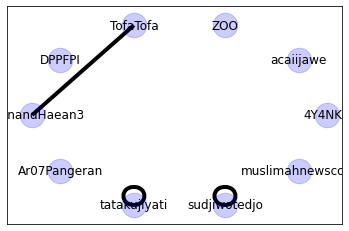

In [28]:
tau.drawGraph(Gt, True, layOut='circular')

Berdasarkan 10 akun twitter yang penting dalam kata kunci 'longsor' diatas, kita tahu berdasarkan gambar graf bahwa akun 'FerdinandHaean3' dan 'TofaTofa' saling berhubungan dalam kata kunci ini.

## Closeness Centrality

In [29]:
Gt = tau.Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['FerdinandHaean3', 'TofaTofa', 'tatakujiyati', 'Hmuzak2', 'KurniaChen', 'AlvaFila', 'akhirzaman78', 'NoegrohoEddie', 'BocaBauKencur', 'Sarip_oyong']
Influencial Users Scores: [0.08528716 0.08495286 0.08040836 0.0757115  0.07535642 0.07519833
 0.07492626 0.07490217 0.07426943 0.07409229]


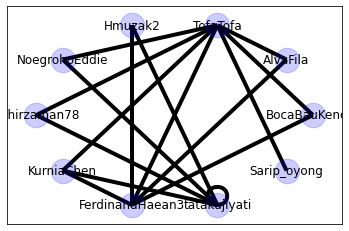

In [30]:
tau.drawGraph(Gt, True, layOut='circular')

Berdasarkan gambar graf diatas, kita dapat katakan bahwa tweet dengan kata kunci 'longsor' banyak diviralkan oleh akun 'FerdinandHaean3','TofaTofa', dan 'tatakujiyati'. Sedangkan diantara 10 akun yg tertera, tweet dari 'Sarip_oyong' hanya memiliki 1 keterkaitan dengan tweet dari 'TofaTofa'. 

## Betweenness Centrality

In [31]:
Gt = tau.Centrality(G, N=10, method='betweeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['TofaTofa', 'DPPFPI', 'tatakujiyati', 'FerdinandHaean3', 'RadioElshinta', 'AlvaFila', 'DJEMARIEDANIANZ', 'NinjaCir3ng', 'Ar07Pangeran', 'aik']
Influencial Users Scores: [0.03462932 0.03102989 0.03008932 0.02683063 0.01674495 0.01139294
 0.0109291  0.01085663 0.01070676 0.00993165]


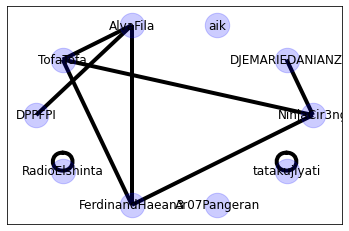

In [32]:
tau.drawGraph(Gt, True, layOut='circular')

Dari gambar graf diatas, dapat dilihat bahwa terdapat 3 cluster dimana cluster 1 ('TofaTofa', 'DPPFPI', 'FerdinandHaean3', 'AlvaFila', 'DJEMARIEDANIANZ', 'NinjaCir3ng'), cluster 2 ('tatakujiyati'), dan claster 3 ('RadioElshinta').

## Eigenvector Centrality

In [33]:
Gt = tau.Centrality(G, N=10, method='eigen', outliers=False, Label = True, layOut='spring')

Influencial Users: ['FerdinandHaean3', 'TofaTofa', '4Y4NKZ', 'panjianom102', 'SukadamK', 'AgungWidrajat', 'prytnma', 'SoniMsi07', 'ferrywf', 'lizaariani5']
Influencial Users Scores: [0.5122283  0.4919351  0.05886549 0.03415081 0.03404835 0.03402042
 0.03396282 0.03392035 0.03390653 0.03388814]


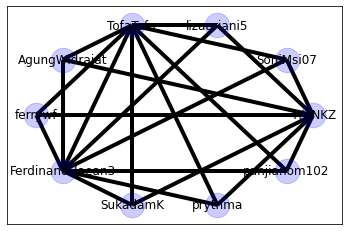

In [34]:
tau.drawGraph(Gt, True, layOut='circular')

Berdasarkan graf diatas, dapat dikatakan bahwa 10 akun yang tertera saling berhubungan dalam twitter dengan kata kunci 'longsor'.

## Clustering Akun Twitter

In [35]:
# Clustering pada Graph = Community Detection
Gt = nx.algorithms.community.greedy_modularity_communities(G)
for community in Gt:
    print(community)

frozenset({'tebel_muka', 'michaeltulus23', 'bernie_supr', 'dea_deatok1', 'astina_bharata', 'Ueh74069664', 'NoKadrun', 'sixpact8471', 'RobertSupratman', 'Lumbalaut1', 'MasMugiAlbaHaf1', 'Alunk_bule', 'RestuAndara99', 'tedi_pirmansyah', 'gustav_tho', 'Koesnad73089397', 'aji_lmajang', 'Canceryous1', 'firzahusainInc', 'aiza1154', 'Koez7', 'papa_centang', 'MrWiseMan2020', 'Yulian020', 'Muchllas_G89', 'CoenLeng', '2Ibnue', 'FerryLege', '4bd03ld04n9', 'GajahMd73582052', 'Cantika82104633', 'AdjiSoerachmat1', 'anti_jijikcabul', 'herygunarto', 'Dennysiregar7', 'MuradAb78494100', 'sepurbanter', 'KITAJokowi_Xyz', 'Icalmiaaauuuww', 'Branoctorian1', 'programmer_tua', 'Nadber8', 'jyantocan', 'Tuahsakato999', 'ElPsyCo83449114', 'wongkalibanteng', 'AnakMel53043582', 'wawan85936154', 'SUPIRTAXIONLINE', 'BuddyA9ustian', 'ElangulungU', 'handersonchania', '0kto71', 'Kenzu_KPTB', 'cak_henry', 'Arifngk', 'Hendrix58556849', 'DiditKhan_', 'HendarminRadius', 'BocaBauKencur', 'damanik_rini', 'winardi_aulia', 'Ko

#  Cleaning Text

In [36]:
Tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)

df=open('/content/UAS-Kapsel/slangword.txt',"r",encoding="utf-8", errors='replace')
slangS = df.readlines(); df.close()
slangS = [t.strip('\n').strip() for t in slangS]
slangS = [t.split(":") for t in slangS]
slangS = [[k.strip(), v.strip()] for k,v in slangS]

slangS = {k:v for k,v in slangS}

factory = StopWordRemoverFactory()
Sastrawi_StopWords_id = factory.get_stop_words()
stopword = Sastrawi_StopWords_id + ['retweet'] + ['amp']

stemmer = StemmerFactory().create_stemmer()

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    return temp

def tokenization(text):
    teks= Tokenizer.tokenize(text)
    return teks

def slang(text):
    for i,t in enumerate(text):
      if t in slangS.keys():
        text[i] = slangS[t]
    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return text

def cleanning (text):
    text = " ".join(word for word in text)
    return text

<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence \[
<input>:25: DeprecationWarning: invalid escape sequence 

In [37]:
df2['clean_dasar'] = df2['full_text'].apply(lambda x: clean_tweet(x))
df2['tokenized'] = df2['clean_dasar'].apply(lambda x: tokenization(x))
df2['slang'] = df2['tokenized'].apply(lambda x: slang(x))
df2['stopword_remove'] = df2['slang'].apply(lambda x: remove_stopwords(x))
df2['stemmed'] = df2['stopword_remove'].apply(lambda x: stemming(x))
df2['cleaned_text'] = df2['stopword_remove'].apply(lambda x: cleanning(x))

df2.head()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: Deprec

,created_at,full_text,source,place,retweet_count,favorite_count,id,id_str,name,screen_name,location,followers_count,friends_count,listed_count,favourites_count,clean_dasar,tokenized,slang,stopword_remove,stemmed,cleaned_text
0,Tue Dec 07 07:07:33 +0000 2021,"RT @KyaiTebas: Semeru Erupsi\nKolaka, Blitar &...","<a href=""http://twitter.com/download/android"" ...",None,11,0,1251995229181231104,1251995229181231104,Nama Tidak Boleh Kosong,yakult_marimas,,639,659,0,33248,rt semeru erupsi kolaka blitar amp temang...,"[retweet, semeru, erupsi, kolaka, blitar, amp,...","[retweet, semeru, erupsi, kolaka, blitar, amp,...","[semeru, erupsi, kolaka, blitar, temanggung, d...","[meru, erupsi, kolaka, blitar, tanggung, terja...",semeru erupsi kolaka blitar temanggung diterja...
1,Tue Dec 07 07:04:24 +0000 2021,RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA...,"<a href=""http://twitter.com/download/android"" ...",None,8,0,1437427188026904585,1437427188026904585,inboxpetiga,inboxpetiga,,54,27,0,568,rt respon cepat satgas becana ligana dpp ppp...,"[retweet, respon, cepat, satgas, becana, ligan...","[retweet, respon, cepat, satgas, becana, ligan...","[respon, cepat, satgas, becana, ligana, dpp, p...","[respon, cepat, satgas, becana, ligana, dpp, p...",respon cepat satgas becana ligana dpp ppp memb...
2,Tue Dec 07 07:03:43 +0000 2021,RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA...,"<a href=""http://twitter.com/download/android"" ...",None,8,0,1430159016395644928,1430159016395644928,jonescada,jonescada,,3,9,0,355,rt respon cepat satgas becana ligana dpp ppp...,"[retweet, respon, cepat, satgas, becana, ligan...","[retweet, respon, cepat, satgas, becana, ligan...","[respon, cepat, satgas, becana, ligana, dpp, p...","[respon, cepat, satgas, becana, ligana, dpp, p...",respon cepat satgas becana ligana dpp ppp memb...
3,Tue Dec 07 07:00:14 +0000 2021,RT @Lania_Rizky: bibit-bibit yang diproduksi d...,"<a href=""http://twitter.com/download/android"" ...",None,4,0,1334214305315622912,1334214305315622912,NONA MANIS,nonamanis2021,"Cirebon Barat, Indonesia",50,80,0,3568,rt bibit bibit yang diproduksi di persemaian...,"[retweet, bibit, bibit, yang, diproduksi, di, ...","[retweet, bibit, bibit, yang, diproduksi, di, ...","[bibit, bibit, diproduksi, persemaian, modern,...","[bibit, bibit, produksi, semai, modern, rumpin...",bibit bibit diproduksi persemaian modern rumpi...
4,Tue Dec 07 06:59:51 +0000 2021,"RT @DPPFPI_Official: Semeru Erupsi\nKolaka, Bl...","<a href=""http://twitter.com/download/android"" ...",None,333,0,1318016044569538560,1318016044569538560,Fachri Al Fattah,FattahFachri,,1643,1556,0,16877,rt semeru erupsi kolaka blitar amp temang...,"[retweet, semeru, erupsi, kolaka, blitar, amp,...","[retweet, semeru, erupsi, kolaka, blitar, amp,...","[semeru, erupsi, kolaka, blitar, temanggung, d...","[meru, erupsi, kolaka, blitar, tanggung, terja...",semeru erupsi kolaka blitar temanggung diterja...


In [38]:
final = df2[['full_text','cleaned_text']]

In [39]:
final

,full_text,cleaned_text
0,"RT @KyaiTebas: Semeru Erupsi\nKolaka, Blitar &...",semeru erupsi kolaka blitar temanggung diterja...
1,RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA...,respon cepat satgas becana ligana dpp ppp memb...
2,RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA...,respon cepat satgas becana ligana dpp ppp memb...
3,RT @Lania_Rizky: bibit-bibit yang diproduksi d...,bibit bibit diproduksi persemaian modern rumpi...
4,"RT @DPPFPI_Official: Semeru Erupsi\nKolaka, Bl...",semeru erupsi kolaka blitar temanggung diterja...
...,...,...
11875,Polres Klaten memberikan bantuan kepada masyar...,polres klaten memberikan bantuan masyarakat ds...
11876,Polres Klaten memberikan bantuan kepada masyar...,polres klaten memberikan bantuan masyarakat ds...
11877,Polres Klaten memberikan bantuan kepada masyar...,polres klaten memberikan bantuan masyarakat ds...
11878,Polres Klaten memberikan bantuan kepada masyar...,polres klaten memberikan bantuan masyarakat ds...


In [40]:
print(final.shape)
final.duplicated().sum()

(11880, 2)


6738

In [41]:
#menghapus entri yang memiliki data duplikat 
final.drop_duplicates(inplace=True)
print(final.duplicated().sum()) # no more duplicates
print(final.shape) # re-check by printing data size

0
(5142, 2)


In [42]:
#bener = final[['cleaned_text']]

In [43]:
#bener.to_json('Databener.json', index='false')

# EDA DASAR 

In [44]:
print("tweet dari user dengan retweet terbanyak")
d_ = df2.loc[df2['retweet_count'].idxmax()]
d_['full_text']

tweet dari user dengan retweet terbanyak


'RT @prkdlx: Nangis, keren bgt 😭 https://t.co/NKQuRkZOVZ'

In [45]:
print("tweet dari user dengan like terbanyak")
l_ = df2.loc[df2['favorite_count'].idxmax()]
l_['full_text']

tweet dari user dengan like terbanyak


'Botak, lu liat retakan ini? Tdk lama lg ini akan longsor merusak jalan. Ngaku2 S1 tapi goblok.\n\nCc @TofaTofa_id https://t.co/kqU9YW9ilc'

In [46]:
followers = df2.sort_values(by=["followers_count"], ascending=False)
followers.head()

,created_at,full_text,source,place,retweet_count,favorite_count,id,id_str,name,screen_name,location,followers_count,friends_count,listed_count,favourites_count,clean_dasar,tokenized,slang,stopword_remove,stemmed,cleaned_text
11691,Fri Dec 10 08:40:03 +0000 2021,Bangunan SDN 3 Temon ambrol karena longsor pad...,"<a href=""https://www.echobox.com"" rel=""nofollo...",None,1,2,69183155,69183155,detikcom,detikcom,"Jakarta, Indonesia",17309896,30,13218,1033,bangunan sdn 3 temon ambrol karena longsor pad...,"[bangunan, sdn, 3, temon, ambrol, karena, long...","[bangunan, sdn, 3, temon, ambrol, karena, long...","[bangunan, sdn, 3, temon, ambrol, longsor, jum...","[bangun, sdn, 3, ton, ambrol, longsor, jumat, ...",bangunan sdn 3 temon ambrol longsor jumat 3 12...
11742,Thu Dec 09 09:17:13 +0000 2021,Rangkaian bencana tersebut bahkan terjadi hany...,"<a href=""https://www.echobox.com"" rel=""nofollo...",None,0,3,69183155,69183155,detikcom,detikcom,"Jakarta, Indonesia",17309887,30,13218,1033,rangkaian bencana tersebut bahkan terjadi hany...,"[rangkaian, bencana, tersebut, bahkan, terjadi...","[rangkaian, bencana, tersebut, bahkan, terjadi...","[rangkaian, bencana, tersebut, bahkan, terjadi...","[rangkai, bencana, sebut, bahkan, jadi, waktu,...",rangkaian bencana tersebut bahkan terjadi wakt...
11838,Mon Dec 06 10:10:30 +0000 2021,"Menurutnya, berdasarkan data pos hujan di selu...","<a href=""https://www.echobox.com"" rel=""nofollo...",None,2,4,69183155,69183155,detikcom,detikcom,"Jakarta, Indonesia",17309878,30,13218,1033,menurutnya berdasarkan data pos hujan di selu...,"[menurutnya, berdasarkan, data, pos, hujan, di...","[menurutnya, berdasarkan, data, pos, hujan, di...","[menurutnya, berdasarkan, data, pos, hujan, se...","[turut, dasar, data, pos, hujan, seluruh, wila...",menurutnya berdasarkan data pos hujan seluruh ...
11844,Mon Dec 06 09:21:37 +0000 2021,Intensitas hujan yang tinggi di wilayah Kabupa...,"<a href=""https://www.echobox.com"" rel=""nofollo...",None,5,8,69183155,69183155,detikcom,detikcom,"Jakarta, Indonesia",17309878,30,13218,1033,intensitas hujan yang tinggi di wilayah kabupa...,"[intensitas, hujan, yang, tinggi, di, wilayah,...","[intensitas, hujan, yang, tinggi, di, wilayah,...","[intensitas, hujan, tinggi, wilayah, kabupaten...","[intensitas, hujan, tinggi, wilayah, kabupaten...",intensitas hujan tinggi wilayah kabupaten lomb...
11140,Mon Dec 06 11:30:45 +0000 2021,Banjir dan longsor melanda Kabupaten Lombok Ba...,"<a href=""https://www.echobox.com"" rel=""nofollo...",None,2,11,69183155,69183155,detikcom,detikcom,"Jakarta, Indonesia",17309846,30,13218,1033,banjir dan longsor melanda kabupaten lombok ba...,"[banjir, dan, longsor, melanda, kabupaten, lom...","[banjir, dan, longsor, melanda, kabupaten, lom...","[banjir, longsor, melanda, kabupaten, lombok, ...","[banjir, longsor, landa, kabupaten, lombok, ba...",banjir longsor melanda kabupaten lombok barat ...


In [47]:
print('user yang nge-tweet terbanyak')
username = df2.groupby(["name","screen_name"])

u_ = username["name"].count() \
                        .reset_index(name='count') \
                        .sort_values(['count'], \
                        ascending=False)

u_.head(1)

user yang nge-tweet terbanyak


,name,screen_name,count
1902,Jawa Pos,jawapos,54


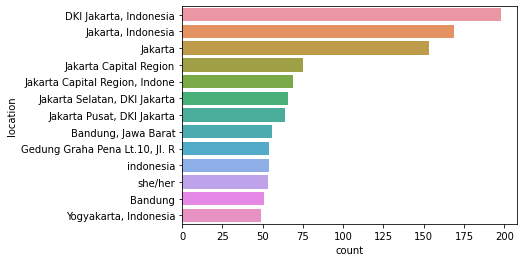

In [48]:
import seaborn as sns, pandas as pd

p = sns.countplot(y=df2.location, order=pd.value_counts(df2.location).iloc[2:15].index)

Berdasarkan visualisasi diatas, dengan menggunakan data location dalam data tweet 'longsor', banyak dari pengguna twitter yang berasal dari daerah provinsi Jakarta. Selain daerah Jakarta, kita lihat juga bahwa daerah Bandung dan Yogyakarta memiliki pengguna twitter yang men-tweet kata kunci longsor.

In [49]:
def plot_frequency_charts(df, feature, title):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

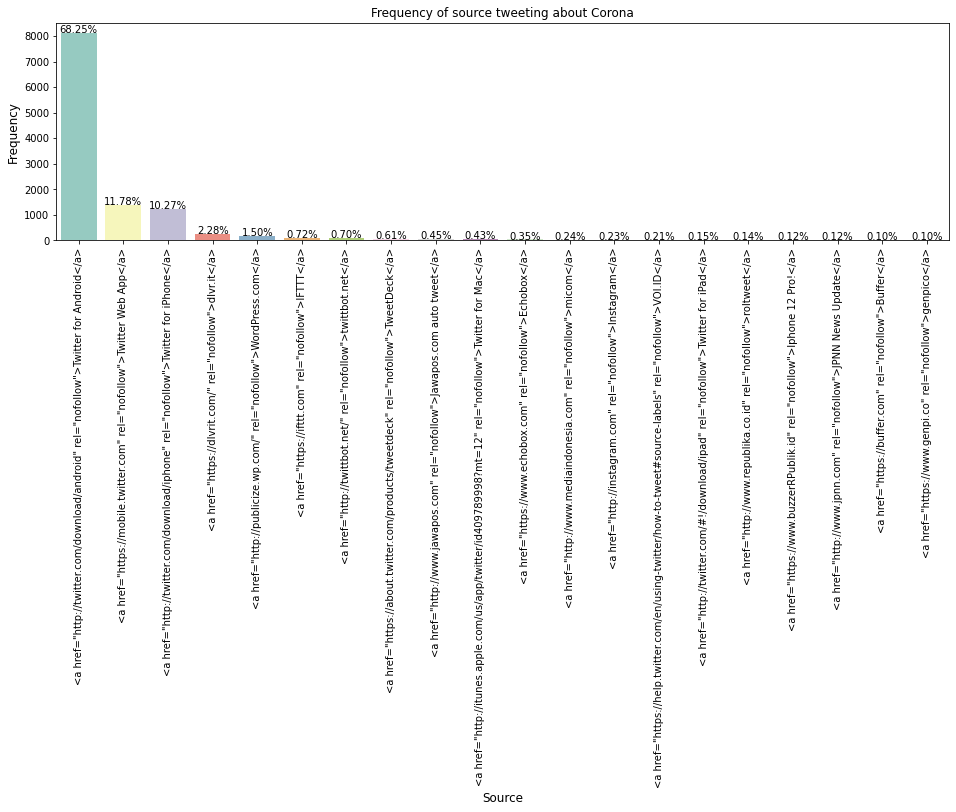

In [50]:
plot_frequency_charts(df2,'source','Source')

Dilihat dari hasil visualisasi diatas, bahwa sebanyak 68,25% pengguna Twitter yang men-tweet kata kunci 'longsor' pada tanggal 4-7 Desember 2021 yang menggunakan Android.

#Labelling

In [51]:
from textblob import TextBlob

In [52]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
final['subjectivity']=final['cleaned_text'].apply(getSubjectivity)
final['polarity']=final['cleaned_text'].apply(getPolarity)

final

,full_text,cleaned_text,subjectivity,polarity
0,"RT @KyaiTebas: Semeru Erupsi\nKolaka, Blitar &...",semeru erupsi kolaka blitar temanggung diterja...,0.0,0.0
1,RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA...,respon cepat satgas becana ligana dpp ppp memb...,0.0,0.0
3,RT @Lania_Rizky: bibit-bibit yang diproduksi d...,bibit bibit diproduksi persemaian modern rumpi...,0.3,0.2
4,"RT @DPPFPI_Official: Semeru Erupsi\nKolaka, Bl...",semeru erupsi kolaka blitar temanggung diterja...,0.0,0.0
11,"musim lagi jelek banget, buat yang daerah nya ...",musim jelek banget buat daerah nya rawan banji...,0.5,0.5
...,...,...,...,...
11803,"Curah hujan tinggi di Sulbar, Kodim jajaran Ko...",curah hujan tinggi sulbar kodim jajaran korem ...,0.0,0.0
11804,"Selasa, 07 Desember 2021, Balai Besar Wilayah ...",selasa 07 desember 2021 balai besar wilayah su...,0.0,0.0
11811,Agung menjelaskan saat ini posisi matahari ber...,agung menjelaskan posisi matahari berada belah...,0.0,0.0
11812,tersebut menyebabkan negara indonesia menjadi ...,tersebut menyebabkan negara indonesia menjadi ...,0.0,0.0


In [53]:
#Create a function to compute the negative, netral, positive analysis
def getAnalysis(score):
  if score <0:
    return 'Negatif'
  elif score == 0:
    return 'Netral'
  else:
    return 'Positif'

final['Analisis']= final['polarity'].apply(getAnalysis)

final

,full_text,cleaned_text,subjectivity,polarity,Analisis
0,"RT @KyaiTebas: Semeru Erupsi\nKolaka, Blitar &...",semeru erupsi kolaka blitar temanggung diterja...,0.0,0.0,Netral
1,RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA...,respon cepat satgas becana ligana dpp ppp memb...,0.0,0.0,Netral
3,RT @Lania_Rizky: bibit-bibit yang diproduksi d...,bibit bibit diproduksi persemaian modern rumpi...,0.3,0.2,Positif
4,"RT @DPPFPI_Official: Semeru Erupsi\nKolaka, Bl...",semeru erupsi kolaka blitar temanggung diterja...,0.0,0.0,Netral
11,"musim lagi jelek banget, buat yang daerah nya ...",musim jelek banget buat daerah nya rawan banji...,0.5,0.5,Positif
...,...,...,...,...,...
11803,"Curah hujan tinggi di Sulbar, Kodim jajaran Ko...",curah hujan tinggi sulbar kodim jajaran korem ...,0.0,0.0,Netral
11804,"Selasa, 07 Desember 2021, Balai Besar Wilayah ...",selasa 07 desember 2021 balai besar wilayah su...,0.0,0.0,Netral
11811,Agung menjelaskan saat ini posisi matahari ber...,agung menjelaskan posisi matahari berada belah...,0.0,0.0,Netral
11812,tersebut menyebabkan negara indonesia menjadi ...,tersebut menyebabkan negara indonesia menjadi ...,0.0,0.0,Netral


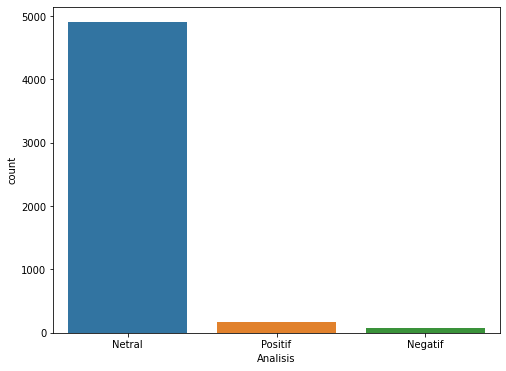

In [54]:
plt.figure(figsize=(8,6))
p = sns.countplot(x="Analisis", data=final)

#TF-IDF

In [55]:
final['tweet_list'] = final['cleaned_text'].apply(lambda x: tokenization(x))

In [56]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

final["TF_dict"] = final['tweet_list'].apply(calc_TF)

final["TF_dict"].head()

0     {'semeru': 0.0625, 'erupsi': 0.0625, 'kolaka':...
1     {'respon': 0.05555555555555555, 'cepat': 0.055...
3     {'bibit': 0.15384615384615385, 'diproduksi': 0...
4     {'semeru': 0.06666666666666667, 'erupsi': 0.06...
11    {'musim': 0.03571428571428571, 'jelek': 0.0357...
Name: TF_dict, dtype: object

In [57]:
print('%20s' % "term", "\t", "TF\n")
for key in final["TF_dict"][0]:
    print('%20s' % key, "\t", final["TF_dict"][0][key])

                term 	 TF

              semeru 	 0.0625
              erupsi 	 0.0625
              kolaka 	 0.0625
              blitar 	 0.0625
          temanggung 	 0.0625
           diterjang 	 0.0625
              puting 	 0.0625
             beliung 	 0.0625
              banjir 	 0.125
             longsor 	 0.0625
              lombok 	 0.0625
                bali 	 0.0625
                 rob 	 0.0625
             jakarta 	 0.0625
                kamu 	 0.0625


In [58]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(final["TF_dict"])

In [59]:
DF

{'semeru': 49,
 'erupsi': 40,
 'kolaka': 4,
 'blitar': 9,
 'temanggung': 5,
 'diterjang': 30,
 'puting': 34,
 'beliung': 33,
 'banjir': 773,
 'longsor': 2253,
 'lombok': 90,
 'bali': 36,
 'rob': 17,
 'jakarta': 72,
 'kamu': 184,
 'respon': 6,
 'cepat': 44,
 'satgas': 6,
 'becana': 2,
 'ligana': 4,
 'dpp': 4,
 'ppp': 8,
 'membantu': 29,
 'korban': 196,
 'bencana': 356,
 'ntb': 42,
 'semoga': 158,
 'sedikit': 24,
 'ma': 5,
 'bibit': 14,
 'diproduksi': 3,
 'persemaian': 13,
 'modern': 6,
 'rumpin': 6,
 'pemerintah': 37,
 'melalui': 44,
 'kemen': 2,
 'lhk': 3,
 'didistribusikan': 4,
 'lokasi': 107,
 'a': 22,
 'jak': 3,
 'musim': 279,
 'jelek': 8,
 'banget': 120,
 'buat': 157,
 'daerah': 130,
 'nya': 140,
 'rawan': 197,
 'rumah': 247,
 'deket': 12,
 'sungai': 70,
 'danau': 6,
 'gunung': 148,
 'semuanya': 14,
 'stay': 27,
 'safe': 23,
 'yaa': 34,
 'semua': 107,
 'selalu': 80,
 'dilindungi': 2,
 'sama': 186,
 'tuhan': 31,
 'maha': 5,
 'esa': 1,
 'bandang': 90,
 'terjang': 8,
 'barat': 103,
 '

In [60]:
n_document = len(final)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [61]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
final["TF-IDF_dict"] = final["TF_dict"].apply(calc_TF_IDF)

In [62]:
# Check TF-IDF result
print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in final["TF-IDF_dict"][3]:
    print('%20s' % key, "\t", final["TF_dict"][3][key] ,"\t" , final["TF-IDF_dict"][3][key])

                term 	         TF 	              TF-IDF

               bibit 	 0.15384615384615385 	 0.8980226441113269
          diproduksi 	 0.07692307692307693 	 0.5506848482081497
          persemaian 	 0.07692307692307693 	 0.45431846601619824
              modern 	 0.07692307692307693 	 0.5076374799054247
              rumpin 	 0.07692307692307693 	 0.5076374799054247
          pemerintah 	 0.07692307692307693 	 0.37750855600764993
             melalui 	 0.07692307692307693 	 0.36450268446580886
               kemen 	 0.07692307692307693 	 0.5728142383967482
                 lhk 	 0.07692307692307693 	 0.5506848482081497
     didistribusikan 	 0.07692307692307693 	 0.5335199596455181
              lokasi 	 0.07692307692307693 	 0.2971589354385858
                   a 	 0.07692307692307693 	 0.4161310132228219


In [63]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

final["TF_IDF_Vec"] = final["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(final["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(final["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.0, 0.051545980826632073, 0.23670318927951348, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20780259767171938, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

matrix size :  50


In [64]:
# Convert Series to List
TF_IDF_Vec_List = np.array(final["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
0,hujan,310.779478
1,longsor,229.907077
12,erosi,128.355792
2,banjir,124.399106
8,musim,103.354915
3,tanah,85.922799
4,2,82.304441
5,kalau,81.284502
10,aku,80.710221
23,pagi,77.822007


#Klasifikasi



In [65]:
docs =  final[['full_text', 'cleaned_text', 'Analisis']]
docs.head()

,full_text,cleaned_text,Analisis
0,"RT @KyaiTebas: Semeru Erupsi\nKolaka, Blitar &...",semeru erupsi kolaka blitar temanggung diterja...,Netral
1,RT @DPP_PPP: Respon Cepat Satgas Becana LIGANA...,respon cepat satgas becana ligana dpp ppp memb...,Netral
3,RT @Lania_Rizky: bibit-bibit yang diproduksi d...,bibit bibit diproduksi persemaian modern rumpi...,Positif
4,"RT @DPPFPI_Official: Semeru Erupsi\nKolaka, Bl...",semeru erupsi kolaka blitar temanggung diterja...,Netral
11,"musim lagi jelek banget, buat yang daerah nya ...",musim jelek banget buat daerah nya rawan banji...,Positif


Data Train, Test

In [66]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(docs['cleaned_text'],docs['Analisis'],test_size=0.2)

Data Train :


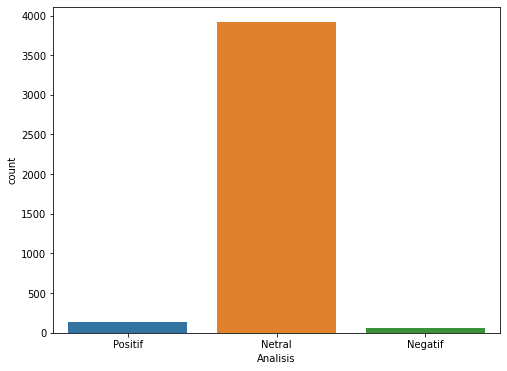

In [68]:
print("Data Train :")
plt.figure(figsize=(8,6))
p = sns.countplot(x=Train_Y, data=Train_X)

Data Test : 


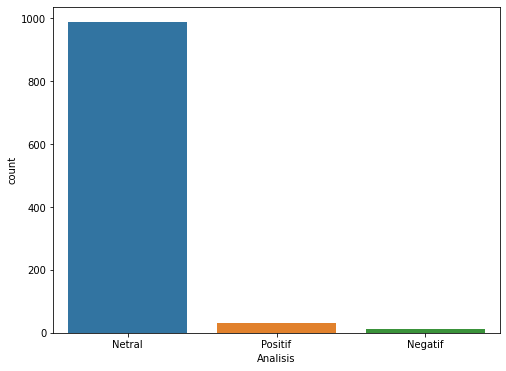

In [69]:
print("Data Test : ")
plt.figure(figsize=(8,6))
p = sns.countplot(x=Test_Y, data=Test_X)

#SVM

## SVM with TF-IDF

In [70]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(docs['cleaned_text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Tfidf_vect.vocabulary_)

{'semeru': 4127, 'erupsi': 1398, 'kolaka': 2285, 'blitar': 792, 'temanggung': 4533, 'diterjang': 1281, 'puting': 3729, 'beliung': 516, 'banjir': 428, 'longsor': 2522, 'lombok': 2517, 'bali': 401, 'rob': 3846, 'jakarta': 1868, 'kamu': 2013, 'respon': 3813, 'cepat': 920, 'satgas': 4008, 'becana': 488, 'ligana': 2481, 'dpp': 1319, 'ppp': 3643, 'membantu': 2731, 'korban': 2313, 'bencana': 526, 'ntb': 3184, 'semoga': 4132, 'sedikit': 4059, 'ma': 2550, 'bibit': 754, 'diproduksi': 1231, 'persemaian': 3527, 'modern': 2999, 'rumpin': 3903, 'pemerintah': 3403, 'melalui': 2697, 'kemen': 2159, 'lhk': 2472, 'didistribusikan': 1151, 'lokasi': 2515, 'jak': 1867, 'musim': 3039, 'jelek': 1918, 'banget': 415, 'buat': 851, 'daerah': 1024, 'nya': 3201, 'rawan': 3770, 'rumah': 3899, 'deket': 1088, 'sungai': 4422, 'danau': 1044, 'gunung': 1599, 'semuanya': 4139, 'stay': 4371, 'safe': 3933, 'yaa': 4960, 'semua': 4138, 'selalu': 4095, 'dilindungi': 1195, 'sama': 3974, 'tuhan': 4761, 'maha': 2569, 'bandang': 4

In [71]:
print(Train_X_Tfidf)

  (0, 4919)	0.24068789973210133
  (0, 4649)	0.12342813235884509
  (0, 4096)	0.17934576989189585
  (0, 3798)	0.21676600261817575
  (0, 3274)	0.1271111295492455
  (0, 3092)	0.1890876780093506
  (0, 3022)	0.22872695117513853
  (0, 2867)	0.22024052311869954
  (0, 2685)	0.12513871754076447
  (0, 2064)	0.16995159855751424
  (0, 2022)	0.19800476085057384
  (0, 1843)	0.23410531473350452
  (0, 1735)	0.048420971585717745
  (0, 1637)	0.18435767744781106
  (0, 1619)	0.407464465933408
  (0, 1548)	0.24917432778854037
  (0, 1432)	0.24068789973210133
  (0, 1004)	0.1963186260047739
  (0, 763)	0.1370996660977273
  (0, 496)	0.27332526202073665
  (0, 454)	0.14401432959944166
  (0, 421)	0.1917712844097412
  (0, 37)	0.2108463517843179
  (1, 3825)	0.5835005835112429
  (1, 1735)	0.13400120483635056
  :	:
  (4107, 17)	0.15185887695115657
  (4107, 8)	0.23678684415739526
  (4108, 1735)	1.0
  (4109, 4497)	0.9696926182525178
  (4109, 2522)	0.24432811157657808
  (4110, 1735)	1.0
  (4111, 4948)	0.4683507772717375
  

In [72]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y))

SVM Accuracy Score ->  0.9640427599611273


In [73]:
print(classification_report(Test_Y,predictions_SVM))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        11
      Netral       0.96      1.00      0.98       988
     Positif       1.00      0.13      0.24        30

    accuracy                           0.96      1029
   macro avg       0.65      0.38      0.41      1029
weighted avg       0.95      0.96      0.95      1029



## SVM with KFolds

In [74]:
def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

def stem(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(1, 1),
    stop_words = Sastrawi_StopWords_id)

In [75]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [76]:
np.random.seed(1)

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(Train_X, Train_Y)
grid_svm.score(Test_X, Test_Y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


0.9640427599611273

# Modelling


In [77]:
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr

In [78]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, Train_X, Train_Y, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

In [79]:
def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):

    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

## Predict Model

In [80]:
grid_svm.predict(["longsor dan banjir udah suatu hal yang biasa di Indonesia"])

array(['Netral'], dtype=object)

In [81]:
grid_svm.predict(["buat daerah rawan banjir dan longsor stay safe ya semoga semua selalu dilindungi sama tuhan maha esa"])

array(['Positif'], dtype=object)

In [82]:
grid_svm.predict(["ini jalan jadi rusak gara-gara longsor, sebel banget dah."])

array(['Netral'], dtype=object)